In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Gaussian Smoothing

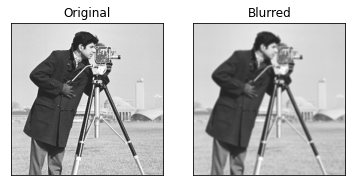

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('cv_test.bmp')

blur = cv.GaussianBlur(img,(5,5),0)

 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:

import cv2
import numpy as np

def median_filter(image, kernel_size):
  """
  Applies a median filter to an image for denoising.

  Args:
      image: The input image as a NumPy array.
      kernel_size: The size of the square window used for the median calculation (must be odd).

  Returns:
      The denoised image as a NumPy array.
  """

  # Ensure image is grayscale (convert if necessary)
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Pad image for border handling (optional, alternative approaches exist)
  padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_CONSTANT, value=0)

  # Apply median filter efficiently using cv2.medianBlur
  denoised_image = cv2.medianBlur(padded_image, kernel_size)

  # Remove padding (if used)
  if padded_image.shape != image.shape:
    denoised_image = denoised_image[kernel_size // 2:-kernel_size // 2, kernel_size // 2:-kernel_size // 2]

  return denoised_image

# Example usage
image = cv2.imread('cv_test1.jpeg')  # Replace with your image path
kernel_size = 5  # Adjust kernel size as needed (must be odd)

denoised_image = median_filter(image, kernel_size)

cv2.imshow('Original Image', image)
cv2.imshow('Denoised Image', denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Edge Detection using Sobel Filter

In [13]:
import cv2
import numpy as np

def sobel_edge_detection(image, scale=1, delta=0, ksize=3):
  """
  Applies Sobel filter for edge detection in an image.

  Args:
      image: The input image as a NumPy array.
      scale: Optional scaling factor for the gradient calculation (default: 1).
      delta: Optional additive constant for thresholding (default: 0).
      ksize: Size of the Sobel filter kernel (default: 3).

  Returns:
      A NumPy array representing the edge map.
  """

  # Ensure image is grayscale (convert if necessary)
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Sobel filter in x and y directions
  grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize, scale=scale, delta=delta)
  grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize, scale=scale, delta=delta)

  # Combine gradients using the L2 norm (approximate magnitude)
  combined_grad = np.sqrt(grad_x**2 + grad_y**2)

  # Optional: Normalize for better visualization (adjust scaling if needed)
  normalized_grad = combined_grad / np.max(combined_grad) * 255

  return normalized_grad  # Or return combined_grad for raw values

# Example usage
image = cv2.imread('cv_test.bmp')  # Replace with your image path
scale = 1  # Adjust scale if needed
delta = 0  # Adjust delta if needed
ksize = 3  # Adjust kernel size if needed

edge_map = sobel_edge_detection(image, scale, delta, ksize)

cv2.imshow('Original Image', image)
cv2.imshow('Sobel Edge Map', edge_map.astype(np.uint8))  # Convert to uint8 for display
cv2.waitKey(0)
cv2.destroyAllWindows()


# Image Sharpening Using Laplacian Filter

In [15]:
import cv2
import numpy as np

def laplacian_sharpening(image, ksize=3):
  """
  Applies Laplacian filter for image sharpening.

  Args:
      image: The input image as a NumPy array.
      ksize: Size of the Laplacian filter kernel (default: 3).

  Returns:
      The sharpened image as a NumPy array.
  """

  # Ensure image is grayscale (convert if necessary)
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Laplacian filter
  laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=ksize)

  # Sharpen the image (subtract Laplacian for emphasizing edges)
  sharpened_image = image - laplacian

  # Clip pixel values to the 0-255 range (optional)
  sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

  return sharpened_image

# Example usage
image = cv2.imread('cv_test.bmp')  # Replace with your image path
ksize = 3  # Adjust kernel size if needed

sharpened_image = laplacian_sharpening(image, ksize)

cv2.imshow('Original Image', image)
cv2.imshow('Sharpened Image (Laplacian)', sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Texture Analysis Using Gabor Filter

In [32]:
import cv2
import numpy as np
from scipy import signal

def gabor_filter(frequency, theta, sigma):
  """
  Creates a 2D Gabor filter with specified parameters.

  Args:
      frequency: Frequency of the Gabor function.
      theta: Orientation of the Gabor function in radians.
      sigma: Standard deviation of the Gaussian envelope.

  Returns:
      A 2D Gabor filter as a NumPy array.
  """
  rows, cols = 5, 5  # Adjust filter size as needed
  wavelength = 1.0 / frequency
  lambd = wavelength * np.pi

  # Create Gabor filter in frequency domain
  u, v = np.meshgrid(np.linspace(-rows/2, rows/2-1, rows), np.linspace(-cols/2, cols/2-1, cols))
  x = u * np.cos(theta) + v * np.sin(theta)
  y = -u * np.sin(theta) + v * np.cos(theta)
  gabor = np.exp(-.5 * (x**2 / sigma**2 + y**2 / sigma**2)) * np.cos(2*np.pi*frequency*x)

  return gabor

def texture_analysis(img, frequencies, thetas):
  """
  Analyzes texture in an image using Gabor filters with various frequencies and orientations.

  Args:
      img: Grayscale image as a NumPy array.
      frequencies: List of frequencies for the Gabor filters.
      thetas: List of orientations (in radians) for the Gabor filters.

  Returns:
      A list of filtered image responses for each combination of frequency and orientation.
  """
  filtered_images = []
  for frequency in frequencies:
    for theta in thetas:
      # Create Gabor filter
      gabor = gabor_filter(frequency, theta, 1.0)  # Adjust sigma as needed

      # Apply filter using convolution
      filtered_img = cv2.filter2D(img, -1, gabor)

      # Append filtered image response
      filtered_images.append(filtered_img)

  return filtered_images

# Load grayscale image
img = cv2.imread("cv_test.bmp", 0)

# Define frequencies and orientations for Gabor filters
frequencies = [0.2, 0.4, 0.8]
thetas = [0, np.pi/4, np.pi/2]

# Analyze texture
filtered_images = texture_analysis(img, frequencies, thetas)

# Visualize some filtered images (optional)
for i, filtered_img in enumerate(filtered_images):
  cv2.imshow("Filtered Image - " + str(i), filtered_img)

cv2.waitKey(0)
cv2.destroyAllWindows()




# Adaptive Histogram Equalization for image enhancement

In [6]:
cv2.__version__


'4.9.0'

In [8]:
import cv2
import numpy as np

def apply_clahe(image, clipLimit=2.0, tileGridSize=(8, 8)):
  """
  Applies Adaptive Histogram Equalization (CLAHE) for image enhancement.

  Args:
      image: The input image as a NumPy array.
      clipLimit: Threshold for contrast limiting (default: 2.0).
      tileGridSize: Size of the grid for adaptive neighborhood (default: (8, 8)).

  Returns:
      The enhanced image as a NumPy array.
  """

  # Convert image to grayscale (if necessary)
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply CLAHE
  clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
  equalized_image = clahe.apply(image.astype(np.uint8))  # Convert to uint8 for processing

  return equalized_image

# Example usage
image = cv2.imread('cv_test.bmp')  # Replace with your image path

enhanced_image = apply_clahe(image)

cv2.imshow('Original Low-Light Image', image)
cv2.imshow('CLAHE Enhanced Image', enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Enhancing Textures in Images Using Wavelet Transform

In [10]:
pip install --upgrade opencv-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pywt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [7]:
import cv2
import numpy as np
import pywt

def wavelet_texture_enhancement(image, wavelet='haar', level=2, threshold=0.3):
  """
  Enhances textures in an image using pywt library.

  Args:
      image: The input image as a NumPy array (grayscale).
      wavelet: Wavelet type (default: 'haar').
      level: Decomposition level (default: 2).
      threshold: Threshold for sharpening high-frequency coefficients (default: 0.3).

  Returns:
      The texture-enhanced image as a NumPy array.
  """

  # Ensure grayscale image
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Discrete Wavelet Transform (DWT) using pywt
  coeffs = pywt.wavedec2(image, wavelet, level=level)

  # Modify high-frequency coefficients (thresholding)
  # Access cD coefficients directly (simpler approach)
  for detail_bands in coeffs[1:]:
    for cD in detail_bands:
      cD[np.abs(cD) > cD.std() * threshold] *= 1.0 / threshold  # Sharpen details

  # Apply Inverse Discrete Wavelet Transform (IDWT) using pywt
  enhanced_image = pywt.waverec2(coeffs, wavelet)

  return enhanced_image

# Example usage
image = cv2.imread('cv_test.bmp')  # Replace with your image path

# Adjust parameters as needed
enhanced_image = wavelet_texture_enhancement(image)

cv2.imshow('Original Image', image)
cv2.imshow('Texture Enhanced Image', enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Rotation about origin by any input angle about origin

In [14]:
import cv2
import numpy as np

def rotate_image(image, angle):
    """
    Rotate the input image around its center by the given angle.
    
    Parameters:
        image: numpy.ndarray
            Input image.
        angle: float
            Angle of rotation in degrees.
    
    Returns:
        numpy.ndarray
            Rotated image.
    """
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    
    # Apply rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    return rotated_image

# Example usage
# Load an example image
image = cv2.imread("cv_test.bmp")

# Rotate the image by 45 degrees
rotated_image = rotate_image(image, 90)

# Display the original and rotated images (you can replace with your own visualization method)
cv2.imshow("Original Image", image)
cv2.imshow("Rotated Image", rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Scale Image by factor tx and ty in X and Y directions, respectively.

In [15]:
import cv2

def scale_image(image, tx, ty):
    """
    Scale the input image by factors tx and ty in the X and Y directions, respectively.
    
    Parameters:
        image: numpy.ndarray
            Input image.
        tx: float
            Scaling factor in the X direction.
        ty: float
            Scaling factor in the Y direction.
    
    Returns:
        numpy.ndarray
            Scaled image.
    """
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate new dimensions after scaling
    new_width = int(width * tx)
    new_height = int(height * ty)
    
    # Resize the image using cv2.resize
    scaled_image = cv2.resize(image, (new_width, new_height))
    
    return scaled_image

# Example usage
# Load an example image
image = cv2.imread("cv_test.bmp")

# Scale the image by factors tx=1.5 and ty=0.5
scaled_image = scale_image(image, 1.5, 0.5)

# Display the original and scaled images (you can replace with your own visualization method)
cv2.imshow("Original Image", image)
cv2.imshow("Scaled Image", scaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Implement Image reflection operation about X or Y axis.

In [16]:
import cv2

def reflect_image(image, axis):
    """
    Reflect the input image about the specified axis.
    
    Parameters:
        image: numpy.ndarray
            Input image.
        axis: str
            Axis of reflection. 'x' for horizontal (Y-axis) reflection, 'y' for vertical (X-axis) reflection.
    
    Returns:
        numpy.ndarray
            Reflected image.
    """
    if axis == 'x':
        # Reflect the image horizontally (around the Y-axis)
        reflected_image = cv2.flip(image, 1)
    elif axis == 'y':
        # Reflect the image vertically (around the X-axis)
        reflected_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid axis. Use 'x' for horizontal reflection or 'y' for vertical reflection.")
    
    return reflected_image

# Example usage
# Load an example image
image = cv2.imread("cv_test.bmp")

# Reflect the image horizontally
reflected_x = reflect_image(image, 'x')

# Reflect the image vertically
reflected_y = reflect_image(image, 'y')

# Display the original and reflected images (you can replace with your own visualization method)
cv2.imshow("Original Image", image)
cv2.imshow("Reflected Horizontal", reflected_x)
cv2.imshow("Reflected Vertical", reflected_y)
cv2.waitKey(0)
cv2.destroyAllWindows()
